In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Desktop/House_Price.csv")
df.sample(5)

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
456,12.7,4.66883,48.10,0.713,5.976,87.9,2.65,2.30,2.78,2.59,19.8,19.01,NO,7.154,15.1016,River,31,YES,0.063763
389,11.5,8.15174,48.10,0.700,5.390,98.9,2.00,1.50,1.95,1.47,19.8,20.85,NO,6.030,12.0920,Lake and River,51,YES,0.061502
320,23.8,0.16760,37.38,0.493,6.426,52.3,4.74,4.32,4.77,4.34,20.4,7.20,YES,6.776,13.1904,River,48,YES,0.055347
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
39,30.8,0.02763,32.95,0.428,6.595,21.8,5.65,5.35,5.55,5.05,21.7,4.32,YES,6.916,12.2464,River,49,YES,0.045051


In [3]:
df.shape

(506, 19)

In [4]:
df.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [6]:
df['price'] = df['price'].astype('int64')
df['crime_rate'] = df['crime_rate'].astype('int64')
df['resid_area'] = df['resid_area'].astype('int64')
df['air_qual'] = df['air_qual'].astype('int64')
df['room_num'] = df['room_num'].astype('int64')
df['age'] = df['age'].astype('int64')
df['dist1'] = df['dist1'].astype('int64')
df['dist2'] = df['dist2'].astype('int64')
df['dist3'] = df['dist3'].astype('int64')
df['dist3'] = df['dist3'].astype('int64')
df['teachers'] = df['teachers'].astype('int64')
df['poor_prop'] = df['poor_prop'].astype('int64')
df['n_hot_rooms'] = df['n_hot_rooms'].astype('int64')
df['parks'] = df['parks'].astype('int64')

In [7]:
X = df.drop(["waterbody","bus_ter","airport",'price',"n_hos_beds"],axis=1)
y = df.price

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(379, 14) (379,)
(127, 14) (127,)


In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

print(lin_reg.score(X_test, Y_test))

0.6044941481105002


MAE: 3.773634425922157
MSE: 28.002177230672114
RMSE: 5.291708347090958


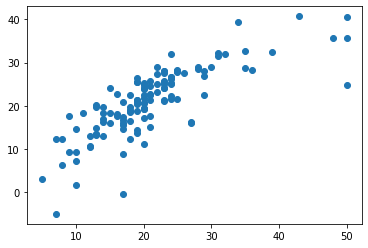

In [11]:
import matplotlib.pyplot as plt
predictions = lin_reg.predict(X_test)  
plt.scatter(Y_test,predictions)


from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(Y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions))) 

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))

2.492834645669291


In [13]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train, Y_train)
Y_pred = model_GBR.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))

2.5910580965214223


In [14]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor()
model_SGD.fit(X_train, Y_train)
Y_pred = model_SGD.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))

6325635434444.776


In [15]:
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBRegressor

model_XGBR = XGBRegressor(learning_rate=0.03,n_estimators=200,objective='reg:squarederror')
model_XGBR.fit(X_train,Y_train)
Y_pred = model_XGBR.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))

2.2626173815389317


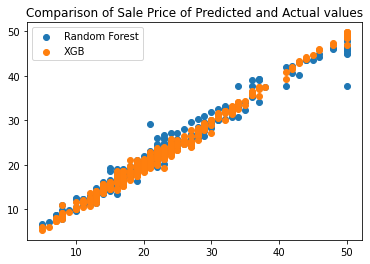

In [16]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(Y_train,model_RFR.predict(X_train),label='Random Forest')
plt.scatter(Y_train,model_XGBR.predict(X_train),label='XGB')
plt.legend()

In [17]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
model = XGBRegressor()

n_estimators   = [100, 200, 500]
learning_rates = [0.03,0.1,0.3]
objectives     = ['reg:squarederror']

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'learning_rate':learning_rates,
    'objective' : objectives
    }

grid_cv = GridSearchCV(estimator = model,
            param_grid = hyperparameter_grid,
            scoring = 'neg_mean_absolute_error',
            return_train_score = True)

grid_cv.fit(X_train,Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'learning_rate': [0.03, 0.1, 0.3],
                         'n_estimators': [100, 200, 500],
                         'objective': ['reg:squarederror']},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [18]:
grid_cv.best_score_

-2.9606833772826615

In [19]:
grid_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [20]:
Y_pred = grid_cv.predict(X_test)
print(mean_absolute_error(Y_test, Y_pred))

2.2626173815389317


# Preparation of Submission Data

In [21]:
Y_Pred = grid_cv.predict(X_test)

In [22]:
Y_Pred

array([24.716936 , 35.107925 , 13.579606 , 24.842192 , 16.80799  ,
       20.715887 , 18.10411  , 13.342941 , 19.989386 , 20.214684 ,
       18.72085  , 17.191015 ,  8.012077 , 22.12173  , 19.66306  ,
       20.958033 , 17.9377   ,  8.338285 , 44.770348 , 14.373963 ,
       26.562174 , 26.453793 , 12.965765 , 20.908083 , 12.719783 ,
       14.546037 , 20.752195 , 15.041868 , 18.152979 , 21.20575  ,
       19.594305 , 22.83914  , 20.252512 , 19.447638 , 14.234281 ,
       15.790369 , 31.410393 , 19.47665  , 21.058483 , 22.616692 ,
       18.698936 , 26.611807 , 43.91103  , 18.53127  , 26.206175 ,
       14.327674 , 15.320741 , 23.296116 , 17.605848 , 33.545383 ,
       19.68016  , 30.97214  , 16.42538  , 21.77263  , 48.035404 ,
       20.949629 , 15.977336 , 28.578663 , 22.215775 , 17.158293 ,
       21.648212 , 35.881756 , 33.30848  , 20.085215 , 24.64748  ,
       17.15067  , 14.450872 , 24.833662 , 27.657196 , 14.575319 ,
       20.781424 , 22.910583 , 10.140849 , 20.213995 , 22.4631

In [23]:
Y_Pred.shape

(127,)

In [24]:
sub = pd.DataFrame()
#sub['Id'] = df['Id']
sub['SalePrice'] = Y_Pred

In [25]:
sub.head()

,SalePrice
0,24.716936
1,35.107925
2,13.579606
3,24.842192
4,16.807989


In [26]:
sub.tail()

,SalePrice
122,6.770985
123,21.409466
124,26.994070
125,22.712355
126,23.789402


In [27]:
sub.to_csv('Submission.csv')